<center><h2 style="color:#B01E68">Implementing a Polynomial Regression Model</h2></center>

<center><h3 style="color:#DC3535">1. Loading Python Modules and Creating Training Data

In [65]:
import numpy as np
np.set_printoptions(suppress=True, precision=2)
import matplotlib.pyplot as plt
%matplotlib widget

Below we create y_train with the following function: $$y = 0.1^5 * x^5 + 2000$$

In [66]:
x_train = np.arange(-100, 101, 5)
y_train = 0.1**5 * (x_train)**5 + 20000

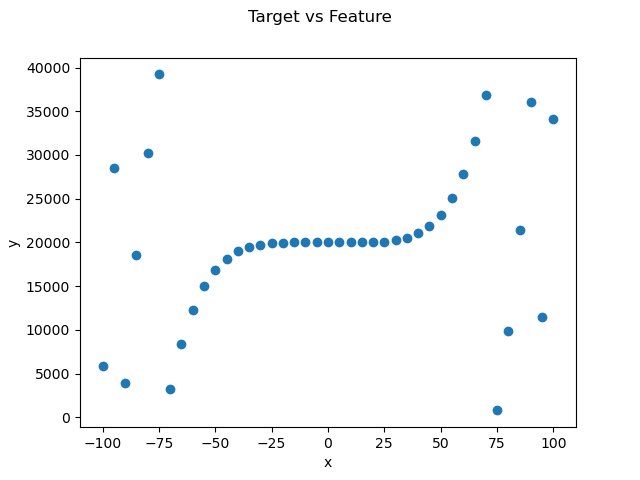

In [67]:
fig1, ax = plt.subplots()
fig1.suptitle('Target vs Feature')
ax.scatter(x_train, y_train)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

By looking at the above plot it is obvious that the relation between the feature and target is not linear. Thus we create more features by raising x_train to the powers from 2 to 7. Then we plot the target against those features.

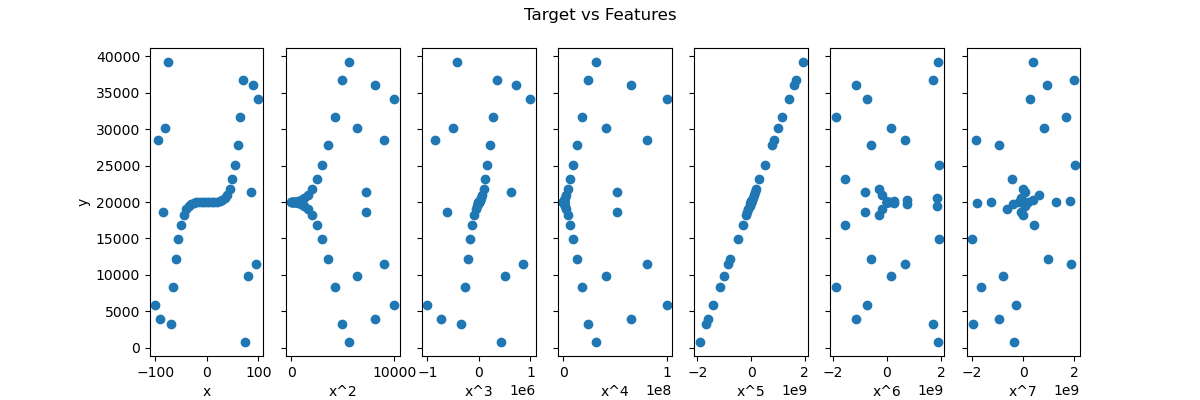

In [68]:
x_train2 = np.c_[x_train, x_train**2, x_train**3, x_train**4, x_train**5, x_train**6, x_train**7]
x_features = ['x', 'x^2', 'x^3', 'x^4', 'x^5', 'x^6', 'x^7', ]

fig2, ax = plt.subplots(1, 7, figsize=(12, 4), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(x_train2[:,i],y_train)
    ax[i].set_xlabel(x_features[i])
ax[0].set_ylabel('y')
fig2.suptitle('Target vs Features')
plt.show()

It is easy to see from the plot above that $x^5$ and $y$ have a linear relationship.

<center><h3 style="color:#DC3535">2. Z-score normalization

In [69]:
#Defining my z-score normalization function
def zscore_norm(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    X_norm = (X - mean) / std
    return X_norm, mean, std

In [70]:
print(f'Range of values of each raw feature: {np.ptp(x_train2,axis=0)}')
print(f'Mean of raw features: {np.mean(x_train2, axis=0)}')
print(f'Standard deviation of raw features: {np.std(x_train2, axis=0)}')

Range of values of each raw feature: [       200      10000    2000000  100000000 -451126454 -493609744
 -261344114]
Mean of raw features: [       0.       3500.          0.   22032500.          0.   96720453.56
        0.  ]
Standard deviation of raw features: [5.92e+01 3.13e+03 4.06e+05 2.93e+07 8.62e+08 1.06e+09 1.05e+09]


In [71]:
x_train2_norm, mean, std = zscore_norm(x_train2)

print(f'Range of values of each normalized feature: {np.ptp(x_train2_norm,axis=0)}') 
print(f'Mean of normalized features: {np.mean(x_train2_norm, axis=0)}')
print(f'Standard deviation of normalized features: {np.std(x_train2_norm, axis=0)}')

Range of values of each normalized feature: [3.38 3.2  4.92 3.41 4.46 3.57 3.84]
Mean of normalized features: [-0. -0. -0. -0. -0.  0. -0.]
Standard deviation of normalized features: [1. 1. 1. 1. 1. 1. 1.]


<center><h3 style="color:#DC3535">3. Cost function

In [72]:
compute_cost = lambda X,y,w,b : np.sum((np.dot(X, w) + b - y)**2) / (2 * X.shape[0])

<center><h3 style="color:#DC3535">4. Gradient

In [73]:
def gradient(x_train, y_train, w, b): 
    error = np.dot(x_train, w) + b - y_train
    deriv_w = np.sum(error[:, np.newaxis] * x_train, 0) / x_train.shape[0]
    deriv_b = np.sum(error) / x_train.shape[0]                         
        
    return deriv_w, deriv_b

<center><h3 style="color:#DC3535">5. Gradient descent

In [74]:
def g_desc(x, y, w_strt, b_strt, alpha, max_iter=1000):
    w, b, cost_hist = w_strt, b_strt, []
    
    for i in range(max_iter):
        d_w, d_b = gradient(x, y, w, b)
        w -= alpha * d_w
        b -= alpha * d_b
        
        cost_hist.append(compute_cost(x,y,w,b))
        
        if i%100 == 0:
            print(f'Iteration: {i:>4}, cost: {round(cost_hist[-1], 2):>7}')
    
    return w, b, cost_hist

<center><h4 style="color:#F49D1A">5.1 Gradient descent with normalized training data </h4></center>

In [75]:
w_optimal, b_optimal, cost_hist = g_desc(x_train2_norm, y_train, np.zeros(7), 0, 0.1)

Iteration:    0, cost: 190323610.81
Iteration:  100, cost:    74.6
Iteration:  200, cost:    6.18
Iteration:  300, cost:    1.28
Iteration:  400, cost:    0.26
Iteration:  500, cost:    0.05
Iteration:  600, cost:    0.01
Iteration:  700, cost:     0.0
Iteration:  800, cost:     0.0
Iteration:  900, cost:     0.0


<center><h4 style="color:#F49D1A">5.2 Quick glance at the parameters of our model </h4></center>

We can see in the cell below that the model exclusively assigned a significant weight to the 5th feature - $x^5$. It correctly reflects the original function we used to create y_train. Moreover the bias was also matched perfectly!

In [76]:
print(f'Optimal weights our model found: {w_optimal}')
print(f'Optimal bias our model found: {b_optimal}')

Optimal weights our model found: [  -0.02   -0.      0.02    0.   8619.76   -0.      0.  ]
Optimal bias our model found: 19999.999999999985


<center><h3 style="color:#DC3535">6. Plotting the normalized model's predictions vs true values

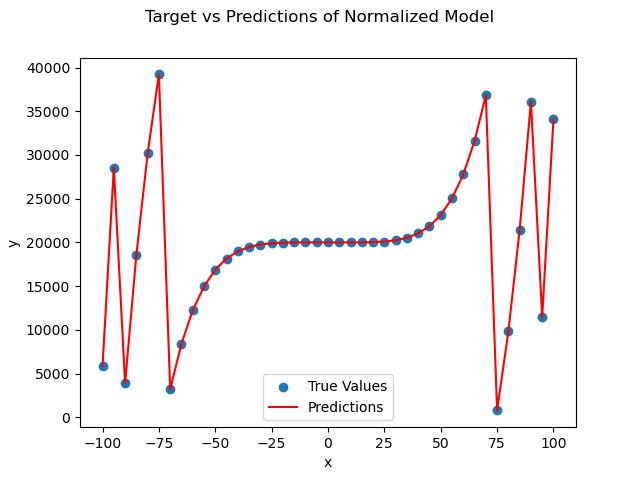

In [77]:
prediction = np.dot(x_train2_norm, w_optimal) + b_optimal

fig3, ax = plt.subplots()
fig3.suptitle('Target vs Predictions of Normalized Model')
ax.scatter(x_train, y_train, label='True Values')
ax.plot(x_train, prediction, c='red', label='Predictions')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()
plt.show()